# Linear Regression


In [74]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle 

from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
def replace_empty_values(df):
    df_cl = df.replace(r'\s+', np.nan, regex=True)
    df_cl = df_cl.replace('', np.nan)
    return df_cl

In [3]:
def univariate_analysis(series, col):
    print(series.describe())
    print("Outliers: " + str(len(outliers(series))))
    normality_test(series)
    univariate_plots(series, col)
    
def outliers(series):
    std = series.std()
    mean = series.mean()
    low = mean - (3*std)
    high = mean + (3*std)
    outliers = []
    for x in series:
        if x < low or x > high:
            outliers.append(x)
    return outliers  

def univariate_plots(series, col):
    snan = series.dropna() 
    plt.figure(figsize=(20,5))
    
    plt.subplot(1, 2, 1)
    plt.hist(snan)
    plt.title(col + " Histogram")
    
    plt.subplot(1, 2, 2)
    plt.boxplot(snan)
    plt.title(col + " Box Plot")
    
def normality_test(series):
    snan = series.dropna()
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(snan)
    results = lzip(name, test)
    if results[1][1] < .05:
        normal = "No"
    else: 
        normal = "Yes"
    print("Normal?: " + normal)
    for result in results:
        print(result[0] + ": " + str(result[1]))
    
def remove_na(series):
    #TODO: insert method that looks at MAR vs MCAT
    null_df = pd.isnull(series)
    clean_df = series.dropna(0)
    
def clean_data(df):
    clean_df = df.dropna()
    return clean_df

In [17]:
cast_as_float(df,['college_readiness'])

In [18]:
drop_cols = ['join_address_x', 'county_number', 'school_level_code','school_type']
df.drop(drop_cols, axis=1, inplace=True)

### Create new features

In [91]:
df['total_students_calc'] = df['male_students'] + df['female_students']

In [93]:
df['pct_eligible_for_free_lunch'] = df['free_lunch_eligible']/df['total_students_calc']

In [175]:
set_mean = lambda x : np.nan if x > 1 else x
df['pct_eligible_for_free_lunch'] = df['pct_eligible_for_free_lunch'].apply(set_mean)

In [162]:
df['pct_eligible_for_reduced_lunch'] = df['reduced_price_lunch_eligible_students']/df['total_students_calc']

In [95]:
df['pct_white'] = df['white_students']/df['total_students_calc']

In [96]:
df['pct_black'] = df['black_students']/df['total_students_calc']

In [97]:
df['pct_hispanic'] = df['hispanic_students']/df['total_students_calc']

### Fill NAs and outliers with average 

In [207]:
prtav = df['pupil_teacher_ratio'].mean()
df['pupil_teacher_ratio'].fillna(value=prtav, inplace=True)

In [208]:
pctfl = df['pct_eligible_for_free_lunch'].mean()
df['pct_eligible_for_free_lunch'].fillna(value=pctfl, inplace=True)

In [209]:
pctrl = df['pct_eligible_for_reduced_lunch'].mean()
df['pct_eligible_for_reduced_lunch'].fillna(value=pctrl, inplace=True)

In [210]:
pctwht = df['pct_white'].mean()
df['pct_white'].fillna(value=pctwht, inplace=True)

In [211]:
pctblk = df['pct_black'].mean()
df['pct_black'].fillna(value=pctblk, inplace=True)

In [212]:
pcthisp = df['pct_hispanic'].mean()
df['pct_hispanic'].fillna(value=pcthisp, inplace=True)

In [213]:
with open('../data/processed/0215_all_features_cleaned.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

### Add Dummy variables

In [214]:
dummies = ['charter_school','magnet_school','shared_time_school','urban_centric_locale']

In [215]:
df_wdum = pd.get_dummies(df, columns=dummies, drop_first=True)

In [216]:
with open('../data/processed/0215_all_wdummies.pkl', 'wb') as picklefile:
    pickle.dump(df_wdum, picklefile)

### Get subset of features for model building

In [11]:
with open('../data/processed/0215_all_wdummies.pkl', 'rb') as picklefile: 
    df_wdum = pickle.load(picklefile)
print(df_wdum.shape)
df_wdum.head()

(1368, 63)


,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,Bay,40.9,A. Crawford Mosley High School,Lynn Haven,FL,82.0,120009000067,Florida,1200090,BAY COUNTY,...,0,0,1,0,0,0,0,0,0,0
1,Harford County Public Schools,28.6,Aberdeen High,Aberdeen,MD,87.0,240039000679,Maryland,2400390,HARFORD COUNTY,...,0,0,1,0,0,0,0,0,0,0
2,Abington Heights SD,35.1,Abington Heights High School,Clarks Summit,PA,93.0,420201005091,Pennsylvania,4202010,LACKAWANNA COUNTY,...,0,0,0,0,0,0,0,1,0,0
3,Abington SD,33.0,Abington High School,Abington,PA,93.0,420204003241,Pennsylvania,4202040,MONTGOMERY COUNTY,...,0,1,0,0,0,0,0,0,0,0
4,San Jose Unified School District,47.1,Abraham Lincoln High,San Jose,CA,94.0,"=""063459005696""",California,"=""0634590""",SANTA CLARA COUNTY,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_wdum['state_county_name'] = df_wdum['county_name'] + " (" + df_wdum['state_x'] + ")"
df_wdum['state_county_name'] = df_wdum['state_county_name'].apply(lambda x: x.lower())

In [85]:
# Import cleaned county data

with open('../data/processed/0219_county_data_cleaned.pkl', 'rb') as picklefile: 
    county_df = pickle.load(picklefile)
print(county_df.shape)
county_df.head()

(3195, 6)


,Year,county_id,state_county_name,pct_all_ages_in_poverty,pct_under_18_in_poverty,median_hh_income
0,2015.0,0.0,united states,14.7,20.7,55775.0
1,2015.0,1000.0,alabama,18.5,26.5,44833.0
2,2015.0,1001.0,autauga county (al),12.7,18.8,56580.0
3,2015.0,1003.0,baldwin county (al),12.9,19.6,52387.0
4,2015.0,1005.0,barbour county (al),32.0,45.2,31433.0


In [86]:
join_df = pd.merge(df_wdum, county_df, how='left', on=['state_county_name'])

In [89]:
join_df.head()

,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote,state_county_name,Year,county_id,pct_all_ages_in_poverty,pct_under_18_in_poverty,median_hh_income
0,Bay,40.9,A. Crawford Mosley High School,Lynn Haven,FL,82.0,120009000067,Florida,1200090,BAY COUNTY,...,0,0,0,0,bay county (fl),2015.0,12005.0,16.5,25.8,47745.0
1,Harford County Public Schools,28.6,Aberdeen High,Aberdeen,MD,87.0,240039000679,Maryland,2400390,HARFORD COUNTY,...,0,0,0,0,harford county (md),2015.0,24025.0,7.8,10.3,77992.0
2,Abington Heights SD,35.1,Abington Heights High School,Clarks Summit,PA,93.0,420201005091,Pennsylvania,4202010,LACKAWANNA COUNTY,...,0,1,0,0,lackawanna county (pa),2015.0,42069.0,15.3,22.4,48000.0
3,Abington SD,33.0,Abington High School,Abington,PA,93.0,420204003241,Pennsylvania,4202040,MONTGOMERY COUNTY,...,0,0,0,0,montgomery county (pa),2015.0,42091.0,6.6,7.5,83258.0
4,San Jose Unified School District,47.1,Abraham Lincoln High,San Jose,CA,94.0,"=""063459005696""",California,"=""0634590""",SANTA CLARA COUNTY,...,0,0,0,0,santa clara county (ca),2015.0,6085.0,8.3,9.0,102191.0


In [169]:
join_df['intercept'] = 1

In [170]:
model_features = ['college_readiness',\
           'intercept',\
           'pct_under_18_in_poverty',\
           'median_hh_income',\
           'total_students_calc',\
           'pupil_teacher_ratio',\
           'pct_eligible_for_free_lunch',\
           'pct_eligible_for_reduced_lunch',\
           'pct_white','pct_black',\
           'pct_hispanic',\
           'charter_school_2-No',\
           'magnet_school_2-No',\
           'magnet_school_–',\
           'shared_time_school_2-No',\
           'shared_time_school_–',\
           'urban_centric_locale_12-City: Mid-size',\
           'urban_centric_locale_13-City: Small',\
           'urban_centric_locale_21-Suburb: Large',\
           'urban_centric_locale_22-Suburb: Mid-size',\
           'urban_centric_locale_23-Suburb: Small',\
           'urban_centric_locale_31-Town: Fringe',\
           'urban_centric_locale_32-Town: Distant',\
           'urban_centric_locale_33-Town: Remote',\
           'urban_centric_locale_41-Rural: Fringe',\
           'urban_centric_locale_42-Rural: Distant',\
           'urban_centric_locale_43-Rural: Remote']

In [171]:
df_model = join_df[model_features]

In [172]:
final_model_df = df_model.dropna()

In [173]:
final_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1367
Data columns (total 27 columns):
college_readiness                           1308 non-null float64
intercept                                   1308 non-null int64
pct_under_18_in_poverty                     1308 non-null float64
median_hh_income                            1308 non-null float64
total_students_calc                         1308 non-null int64
pupil_teacher_ratio                         1308 non-null float64
pct_eligible_for_free_lunch                 1308 non-null float64
pct_eligible_for_reduced_lunch              1308 non-null float64
pct_white                                   1308 non-null float64
pct_black                                   1308 non-null float64
pct_hispanic                                1308 non-null float64
charter_school_2-No                         1308 non-null uint8
magnet_school_2-No                          1308 non-null uint8
magnet_school_–                            

In [174]:
final_model_df = final_model_df[final_model_df['total_students_calc'] < 3867]

In [175]:
# Drop schools with 10 or less students

final_model_df.drop(df_model[df_model['total_students_calc']<11].index.values)

,college_readiness,intercept,pct_under_18_in_poverty,median_hh_income,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,40.9,1,25.8,47745.0,1687,20.080000,0.346177,0.085359,0.808536,0.087730,...,0,0,1,0,0,0,0,0,0,0
1,28.6,1,10.3,77992.0,1444,15.010000,0.354571,0.086565,0.427978,0.348338,...,0,0,1,0,0,0,0,0,0,0
2,35.1,1,22.4,48000.0,1034,13.290000,0.102515,0.020309,0.907157,0.018375,...,0,0,0,0,0,0,0,1,0,0
3,33.0,1,7.5,83258.0,1743,14.480000,0.154332,0.023523,0.647160,0.232358,...,0,1,0,0,0,0,0,0,0,0
4,47.1,1,9.0,102191.0,1851,23.150000,0.438142,0.097245,0.154511,0.041059,...,0,0,0,0,0,0,0,0,0,0
5,55.4,1,13.5,90527.0,2027,21.410000,0.461766,0.181549,0.055254,0.056734,...,0,0,0,0,0,0,0,0,0,0
6,100.0,1,22.9,56244.0,644,15.220000,0.021739,0.013975,0.844720,0.023292,...,1,0,0,0,0,0,0,0,0,0
7,40.1,1,38.4,41210.0,857,21.970000,0.557760,0.045508,0.150525,0.474912,...,0,0,0,0,0,0,0,0,0,0
8,57.1,1,15.7,70581.0,267,14.310000,0.101124,0.033708,0.419476,0.179775,...,0,1,0,0,0,0,0,0,0,0
9,78.2,1,15.7,70581.0,267,14.310000,0.101124,0.033708,0.419476,0.179775,...,0,1,0,0,0,0,0,0,0,0


In [176]:
final_model_df# Drop schools with a pupil/teacher ratio higher than 55

final_model_df.drop(final_model_df[final_model_df['pupil_teacher_ratio']>=55.0].index.values)

,college_readiness,intercept,pct_under_18_in_poverty,median_hh_income,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,40.9,1,25.8,47745.0,1687,20.080000,0.346177,0.085359,0.808536,0.087730,...,0,0,1,0,0,0,0,0,0,0
1,28.6,1,10.3,77992.0,1444,15.010000,0.354571,0.086565,0.427978,0.348338,...,0,0,1,0,0,0,0,0,0,0
2,35.1,1,22.4,48000.0,1034,13.290000,0.102515,0.020309,0.907157,0.018375,...,0,0,0,0,0,0,0,1,0,0
3,33.0,1,7.5,83258.0,1743,14.480000,0.154332,0.023523,0.647160,0.232358,...,0,1,0,0,0,0,0,0,0,0
4,47.1,1,9.0,102191.0,1851,23.150000,0.438142,0.097245,0.154511,0.041059,...,0,0,0,0,0,0,0,0,0,0
5,55.4,1,13.5,90527.0,2027,21.410000,0.461766,0.181549,0.055254,0.056734,...,0,0,0,0,0,0,0,0,0,0
6,100.0,1,22.9,56244.0,644,15.220000,0.021739,0.013975,0.844720,0.023292,...,1,0,0,0,0,0,0,0,0,0
7,40.1,1,38.4,41210.0,857,21.970000,0.557760,0.045508,0.150525,0.474912,...,0,0,0,0,0,0,0,0,0,0
8,57.1,1,15.7,70581.0,267,14.310000,0.101124,0.033708,0.419476,0.179775,...,0,1,0,0,0,0,0,0,0,0
9,78.2,1,15.7,70581.0,267,14.310000,0.101124,0.033708,0.419476,0.179775,...,0,1,0,0,0,0,0,0,0,0


In [177]:
df_corr = final_model_df.corr()
df_corr

,college_readiness,intercept,pct_under_18_in_poverty,median_hh_income,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
college_readiness,1.000000,NaN,-0.123056,0.273913,-0.013905,0.049327,-0.246296,-0.162332,-0.092362,-0.045033,...,0.002140,0.163967,-0.052537,-0.039740,-0.083228,-0.141798,-0.098193,-0.063303,-0.142331,-0.069982
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_under_18_in_poverty,-0.123056,NaN,1.000000,-0.799912,-0.075154,0.123961,0.443379,0.144800,-0.300372,0.251963,...,0.002133,-0.210763,-0.008636,0.002731,-0.009685,0.017792,0.056777,-0.120869,0.026217,0.066365
median_hh_income,0.273913,NaN,-0.799912,1.000000,0.174197,-0.056323,-0.307075,-0.143427,-0.017184,-0.117580,...,-0.017391,0.274965,-0.061026,-0.035878,-0.033869,-0.111605,-0.142317,0.030882,-0.135906,-0.133322
total_students_calc,-0.013905,NaN,-0.075154,0.174197,1.000000,0.195638,-0.131896,-0.134864,-0.202301,-0.022705,...,0.076198,0.256085,-0.028855,-0.021093,-0.107648,-0.139086,-0.079647,-0.088113,-0.204327,-0.146391
pupil_teacher_ratio,0.049327,NaN,0.123961,-0.056323,0.195638,1.000000,0.136286,0.108030,-0.226505,0.013380,...,-0.011873,0.018443,-0.031003,0.007211,-0.024728,-0.061884,-0.007977,-0.000615,-0.090495,-0.091351
pct_eligible_for_free_lunch,-0.246296,NaN,0.443379,-0.307075,-0.131896,0.136286,1.000000,0.412362,-0.575852,0.276093,...,-0.025802,-0.190468,-0.050127,-0.010394,-0.003639,0.046038,0.039673,-0.134314,0.012765,0.029028
pct_eligible_for_reduced_lunch,-0.162332,NaN,0.144800,-0.143427,-0.134864,0.108030,0.412362,1.000000,-0.195472,-0.033570,...,-0.026224,-0.060609,-0.018872,0.003620,0.017232,0.071532,0.000569,-0.046226,0.046090,0.059259
pct_white,-0.092362,NaN,-0.300372,-0.017184,-0.202301,-0.226505,-0.575852,-0.195472,1.000000,-0.426007,...,-0.010841,-0.005109,0.094238,0.056157,0.088766,0.107671,0.059936,0.193815,0.199305,0.079142
pct_black,-0.045033,NaN,0.251963,-0.117580,-0.022705,0.013380,0.276093,-0.033570,-0.426007,1.000000,...,0.049182,-0.094028,-0.031982,-0.062662,-0.074620,-0.065075,-0.064770,-0.053451,-0.093410,-0.058179


In [178]:
df_corr['college_readiness'].sort_values(ascending = False)

college_readiness                           1.000000
median_hh_income                            0.273913
urban_centric_locale_21-Suburb: Large       0.163967
pupil_teacher_ratio                         0.049327
shared_time_school_2-No                     0.043452
urban_centric_locale_12-City: Mid-size      0.023473
magnet_school_–                             0.007206
urban_centric_locale_13-City: Small         0.002140
total_students_calc                        -0.013905
pct_hispanic                               -0.029953
urban_centric_locale_23-Suburb: Small      -0.039740
pct_black                                  -0.045033
shared_time_school_–                       -0.047229
urban_centric_locale_22-Suburb: Mid-size   -0.052537
urban_centric_locale_41-Rural: Fringe      -0.063303
charter_school_2-No                        -0.065602
urban_centric_locale_43-Rural: Remote      -0.069982
urban_centric_locale_31-Town: Fringe       -0.083228
magnet_school_2-No                         -0.

In [179]:
# Fit regression model
X = final_model_df.ix[:,1:]
y = final_model_df['college_readiness']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

results = sm.OLS(y_train,X_train).fit()
# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      college_readiness   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     17.20
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           5.79e-60
Time:                        18:00:47   Log-Likelihood:                -3671.2
No. Observations:                 907   AIC:                             7394.
Df Residuals:                     881   BIC:                             7519.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
intercept                                   72.9984     12.735      5.732      0.000        48.004    97.992
pct_under_18_in_poverty                      0.4873      0.127      3.847      0.000         0.239     0.736
median_hh_income                             0.0003   5.86e-05      5.376      0.000         0.000     0.000
total_students_calc                         -0.0046      0.001     -6.744      0.000        -0.006    -0.003
pupil_teacher_ratio                          0.2852      0.080      3.564      0.000         0.128     0.442
pct_eligible_for_free_lunch                -25.9421      3.279     -7.911      0.000       -32.378   -19.506
pct_eligible_for_reduced_lunch             -12.7787      8.289     -1.542      0.124       -29.047     3.489
pct_white                                  -28.8077      4.135     -6.967      0.000       -36.923   -20.693
pct_black                                  -35.6577      5.428     -6.570      0.000       -46.310   -25.005
pct_hispanic                               -16.6600      4.401     -3.785      0.000       -25.298    -8.022
charter_school_2-No                         -6.0622      1.674     -3.621      0.000        -9.348    -2.776
magnet_school_2-No                          -2.4282      1.265     -1.919      0.055        -4.912     0.055
magnet_school_–                             -5.8321      1.733     -3.365      0.001        -9.233    -2.431
shared_time_school_2-No                    -11.0710     10.059     -1.101      0.271       -30.813     8.671
shared_time_school_–                       -20.5868     10.122     -2.034      0.042       -40.453    -0.721
urban_centric_locale_12-City: Mid-size      -4.4464      2.529     -1.758      0.079        -9.409     0.516
urban_centric_locale_13-City: Small         -7.0104      2.259     -3.103      0.002       -11.444    -2.577
urban_centric_locale_21-Suburb: Large       -6.0447      1.733     -3.488      0.001        -9.446    -2.643
urban_centric_locale_22-Suburb: Mid-size   -12.5071      3.104     -4.029      0.000       -18.599    -6.415
urban_centric_locale_23-Suburb: Small      -10.2444      4.012     -2.553      0.011       -18.119    -2.370
urban_centric_locale_31-Town: Fringe       -15.6997      3.411     -4.603      0.000       -22.393    -9.006
urban_centric_locale_32-Town: Distant      -15.7376      3.030     -5.194      0.000       -21.685    -9.791
urban_centric_locale_33-Town: Remote       -16.7240      3.781     -4.423      0.000       -24.145    -9.303
urban_centric_locale_41-Rural: Fringe      -10.6279      2.238     -4.750      0.000       -15.020    -6.236
urban_centric_locale_42-Rural: Distant     -16.3033      3.405     -4.788      0.000       -22.986    -9.621
urban_centric_locale_43-Rural: 

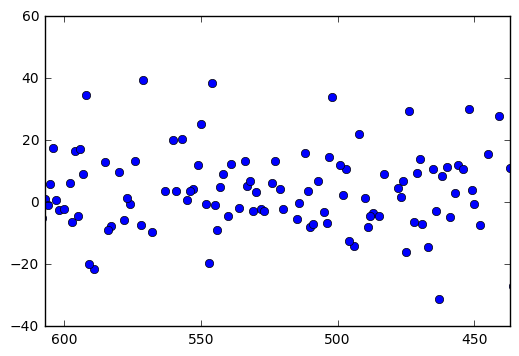

In [181]:
results.resid.plot(style='o')

In [187]:
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
lasso.coef_

array([  0.00000000e+00,   6.83424171e-01,   5.20946896e-04,
        -2.44713000e-03,   2.10551297e-01,  -8.98573812e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -1.47070352e+00,  -7.69387037e-01,
        -0.00000000e+00,   0.00000000e+00,  -7.39500314e-01,
         0.00000000e+00,   0.00000000e+00,   5.84109311e-01,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00])

In [193]:
# Create LassoCV object; set seed for reproducibility
lasso_cv = linear_model.LassoCV(cv=10, n_alphas=5)

# Create model
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=5, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [194]:
lasso_y_pred = lasso_cv.predict(X_test)
print("root mean squared error", mean_squared_error(y_test, lasso_y_pred)**.5)

root mean squared error 16.1097929642


In [195]:
print("r2", r2_score(y_test, lasso_y_pred))

r2 0.0747857464892


In [196]:
# Output coefficients of best model 
lasso_cv.coef_

array([ 0.        ,  0.        ,  0.00028719, -0.00138025,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        , -0.        ])

In [197]:
lasso_cv_y_pred = lasso_cv.predict(X_test)
print("root mean squared error", mean_squared_error(y_test, lasso_cv_y_pred)**.5)

root mean squared error 16.1097929642


In [198]:
print("r2", r2_score(y_test, lasso_cv_y_pred))

r2 0.0747857464892


In [199]:
zip_coefs = zip(model_features, lasso_cv.coef_)

In [200]:
for item in zip_coefs:
    print(item)

('college_readiness', 0.0)
('intercept', 0.0)
('pct_under_18_in_poverty', 0.00028718608208059832)
('median_hh_income', -0.0013802517297474373)
('total_students_calc', 0.0)
('pupil_teacher_ratio', -0.0)
('pct_eligible_for_free_lunch', -0.0)
('pct_eligible_for_reduced_lunch', -0.0)
('pct_white', 0.0)
('pct_black', 0.0)
('pct_hispanic', -0.0)
('charter_school_2-No', -0.0)
('magnet_school_2-No', -0.0)
('magnet_school_–', 0.0)
('shared_time_school_2-No', -0.0)
('shared_time_school_–', 0.0)
('urban_centric_locale_12-City: Mid-size', 0.0)
('urban_centric_locale_13-City: Small', 0.0)
('urban_centric_locale_21-Suburb: Large', -0.0)
('urban_centric_locale_22-Suburb: Mid-size', -0.0)
('urban_centric_locale_23-Suburb: Small', -0.0)
('urban_centric_locale_31-Town: Fringe', -0.0)
('urban_centric_locale_32-Town: Distant', -0.0)
('urban_centric_locale_33-Town: Remote', -0.0)
('urban_centric_locale_41-Rural: Fringe', -0.0)
('urban_centric_locale_42-Rural: Distant', -0.0)


In [185]:
with open('../data/processed/0220_model_ready.pkl', 'wb') as picklefile:
    pickle.dump(df_model, picklefile)